In [1]:
from google.colab import drive
import os 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

from zipfile import ZipFile

In [2]:
source = os.path.realpath('/content/drive/MyDrive/ColabNotebooks/ML_freshwater_management_project/data')
for items in os.listdir(source):
  if '.zip' in items:
    with ZipFile(source+"/"+items, 'r') as obj_zip:
      obj_zip.extractall(source)
      files = os.listdir(source)
      filenames = [name.split('.')[0] for name in files]
      print(files)
      print(filenames)


KeyError: ignored

In [9]:
PATH = '/content/drive/MyDrive/ColabNotebooks/ML_freshwater_management_project/data/Lake_Water_Level/'
files = os.listdir(PATH)
filenames = [name.split('.')[0] for name in files]
df_list = []
for n, f in zip(filenames, files):
  f_var = n + "_df"
  df_list.append(f_var)
  locals()[f_var] = pd.read_csv(PATH + f,index_col=0)

In [10]:
df_list

['Sentinel_3B_water_level_Version0_df', 'Sentinel_3A_water_level_Version0_df']

In [21]:
Sentinel_3A_water_level_Version0_df.columns =  	['Lake_name' 	,'Latitude' 	,'Longitude' 	,'Relative_orbit', 	'water_level']

In [22]:
S3a_water_lev_athaba_df = Sentinel_3A_water_level_Version0_df[Sentinel_3A_water_level_Version0_df['Lake_name']=='Athabasca']
S3a_water_lev_athaba_df.head()

,Lake_name,Latitude,Longitude,Relative_orbit,water_level
Date (YYYYMMDD),,,,,
20160403,Athabasca,59.244637,-108.047469,303,208.303892
20160403,Athabasca,59.247528,-108.049405,303,208.131251
20160403,Athabasca,59.250420,-108.051342,303,208.550610
20160403,Athabasca,59.253311,-108.053278,303,208.300569
20160403,Athabasca,59.256202,-108.055216,303,208.333929


In [37]:
athaba_truncated_df = S3a_water_lev_athaba_df.drop(labels=['Lake_name','Relative_orbit'],axis=1).reset_index()
athaba_truncated_df.columns = ['Date','Latitude' 	,'Longitude' 	,	'water_level']

In [38]:
athaba_truncated_df.isna().any()

Date           False
Latitude       False
Longitude      False
water_level    False
dtype: bool

In [40]:
athaba_truncated_df.describe()

,Date,Latitude,Longitude,water_level
count,4.537100e+04,45371.000000,45371.000000,45371.000000
mean,2.017887e+07,59.177226,-109.470924,213.290736
std,1.448703e+04,0.239640,0.913259,18.077624
min,2.016040e+07,58.606485,-110.859292,188.571243
25%,2.017031e+07,59.036155,-110.511041,208.626423
50%,2.018023e+07,59.225278,-109.432168,208.954531
75%,2.019021e+07,59.354055,-108.916882,209.504042
max,2.021093e+07,59.619522,-106.175994,434.685622


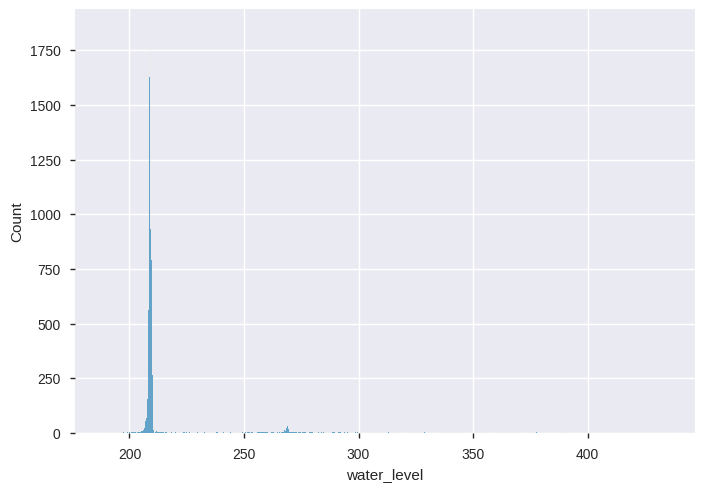

In [43]:
sns.histplot(athaba_truncated_df,x='water_level')